This model will focus on predicting whether the overall temperature Janurary of the upcoming year in New York City will be below or above average. We will use historical data from 1871, and the data will be temp. anamolies by month, starting from June.

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [600]:
dftemp = pd.read_csv("central park temps.csv")
dftemp.head()

,Average Monthly & Annual Temperatures at Central Park\nLast Updated: 5/9/21,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,NaN
1,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4,NaN
2,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6,NaN
3,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1,NaN
4,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0,NaN


Let's clean up the data a little bit. Get the columns to be named whatever is in row 0.

In [601]:
dftemp.columns = dftemp.iloc[0]
dftemp = dftemp.drop(0, axis = 0)
dftemp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,NaN
1,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4,NaN
2,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6,NaN
3,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1,NaN
4,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0,NaN
5,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0,NaN


Let's make sure nothings wrong with both our datasets! See if any data is missing.

<AxesSubplot:xlabel='0'>

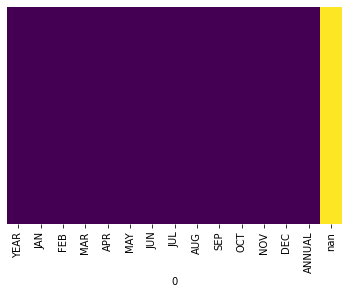

In [602]:
sns.heatmap(dftemp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ok, we are good to go! Let's start by creating a new dataset that features solely the columns we want to use as our target features in predicting Janurary's anamoly.
Let's start by creating a dataset that contains the temp. anamoly (using the entire data as a baseline) and rainfall from September to December, therefore a total of 8 column features.
We need to start by defining the baseline temp. for each month and subtract the actual temp. that month from the baseline.

In [603]:
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 152
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    152 non-null    object 
 1   JAN     152 non-null    object 
 2   FEB     152 non-null    object 
 3   MAR     152 non-null    object 
 4   APR     152 non-null    object 
 5   MAY     152 non-null    object 
 6   JUN     152 non-null    object 
 7   JUL     152 non-null    object 
 8   AUG     152 non-null    object 
 9   SEP     152 non-null    object 
 10  OCT     152 non-null    object 
 11  NOV     152 non-null    object 
 12  DEC     152 non-null    object 
 13  ANNUAL  152 non-null    object 
 14  nan     0 non-null      float64
dtypes: float64(1), object(14)
memory usage: 19.0+ KB


In [604]:
for i in np.linspace(0,12,13):
    i = i.astype(int)
    dftemp.iloc[:,i] = dftemp.iloc[:,i].astype(float)
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 152
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    152 non-null    float64
 1   JAN     152 non-null    float64
 2   FEB     152 non-null    float64
 3   MAR     152 non-null    float64
 4   APR     152 non-null    float64
 5   MAY     152 non-null    float64
 6   JUN     152 non-null    float64
 7   JUL     152 non-null    float64
 8   AUG     152 non-null    float64
 9   SEP     152 non-null    float64
 10  OCT     152 non-null    float64
 11  NOV     152 non-null    float64
 12  DEC     152 non-null    float64
 13  ANNUAL  152 non-null    object 
 14  nan     0 non-null      float64
dtypes: float64(14), object(1)
memory usage: 19.0+ KB


In [605]:
baseline = []
for i in np.linspace(6,12,7):
    i = i.astype(int)
    baseline.append(dftemp.iloc[:,i].mean())
baseline

[71.03223684210526,
 76.24144736842105,
 74.62828947368423,
 67.9453947368421,
 57.12302631578948,
 46.242763157894714,
 36.02565789473687]

Now let's build our new dataset consisting of the columns we want!

In [606]:
tempmodel = pd.DataFrame(dftemp.iloc[:,0].head(-1))
for i in np.linspace(6,12,7):
    i = i.astype(int)
    d1 = pd.DataFrame(dftemp.iloc[:,i].head(-1) - baseline[i-6])
    tempmodel = tempmodel.join(d1)
tempmodel.head()

,YEAR,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1,1869.0,-1.732237,-3.441447,-2.828289,-2.345395,-6.223026,-5.942763,-1.325658
2,1870.0,1.867763,0.358553,0.671711,-0.345395,-0.423026,-0.742763,-1.925658
3,1871.0,-2.832237,-3.941447,-1.028289,-7.145395,-1.523026,-7.442763,-6.825658
4,1872.0,0.167763,1.258553,0.971711,-1.545395,-3.923026,-5.242763,-9.325658
5,1873.0,-0.732237,-0.841447,-2.628289,-2.545395,-1.323026,-9.242763,0.474342


Great, now let's create 1 last column; the output! In this case, it will be a binary column of whether the following Janurary was below (0) or above (1) normal. Let's create it!

In [607]:
tempmodel = tempmodel.join(pd.DataFrame(dftemp.iloc[:,1].shift(-1) - dftemp.iloc[:,1].shift(-1).mean()), rsuffix = 'JAN')
for i in np.linspace(0 , len(tempmodel['JAN'])-1 , 151):
    i = i.astype(int)
    if tempmodel['JAN'].iloc[i] > 0:
        tempmodel['JAN'].iloc[i] = 1
    else:
        tempmodel['JAN'].iloc[i] = 0
tempmodel['JAN'] = tempmodel['JAN'].astype(int)
tempmodel.head()

,YEAR,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN
1,1869.0,-1.732237,-3.441447,-2.828289,-2.345395,-6.223026,-5.942763,-1.325658,1
2,1870.0,1.867763,0.358553,0.671711,-0.345395,-0.423026,-0.742763,-1.925658,0
3,1871.0,-2.832237,-3.941447,-1.028289,-7.145395,-1.523026,-7.442763,-6.825658,0
4,1872.0,0.167763,1.258553,0.971711,-1.545395,-3.923026,-5.242763,-9.325658,0
5,1873.0,-0.732237,-0.841447,-2.628289,-2.545395,-1.323026,-9.242763,0.474342,1


We now have our dataset!! Let's see if we can predict whether Janurary will be below or above normal!!

But first, let's see if any of the months are useful in predicting the outcome of Janurary. 

<AxesSubplot:>

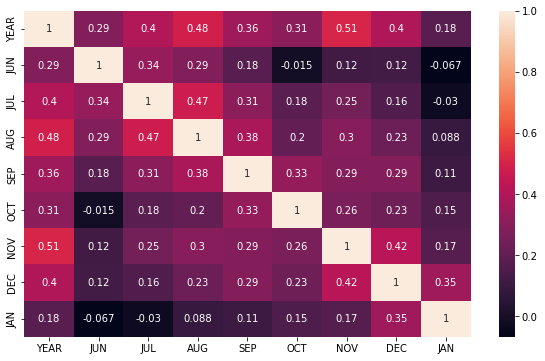

In [608]:
plt.figure(figsize = (10,6))
sns.heatmap(tempmodel.corr(), annot = True)

Let's do some insight; you have the highest chance of correctly predicting the overall temperature of August based on July's conditions, out of any month used to predict its corresponding month.
After that it's:

Predicting December based on November
Predicting September based on August
Predicting Janurary based on December
Predicting July based on June
Predicting October based on September
Predicting November based on October

Also by correlating each month by year, you can see global warming is real; November is warming up the fastest, followed by August and December. Interestingly, Janurary is the lowest. 

Want to use how hot this summer was to predict how cold/hot Janurary will be? That won't work, as the R-values are too low. Let's drop those, along with Sept.


In [609]:
tempmodel = tempmodel.drop( columns = ['JUN', 'JUL', 'AUG', 'SEP'])
tempmodel.head()

,YEAR,OCT,NOV,DEC,JAN
1,1869.0,-6.223026,-5.942763,-1.325658,1
2,1870.0,-0.423026,-0.742763,-1.925658,0
3,1871.0,-1.523026,-7.442763,-6.825658,0
4,1872.0,-3.923026,-5.242763,-9.325658,0
5,1873.0,-1.323026,-9.242763,0.474342,1


Let's start the prediction!

Since we are trying to predict a binary output, we will use supervised machine learning techniques that spit out categorical outputs. We will apply:
-Logisitic Regression
-K-nearest Neighbors
-Decision Tree + Random Forest
-Support Vector Machine

In [610]:
from sklearn.model_selection import train_test_split

In [611]:
x_train, x_test, y_train, y_test = train_test_split(tempmodel.drop( columns = ['JAN'], axis = 1), tempmodel['JAN'], test_size = 0.4, random_state = 101)

In [612]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [613]:
predictions = logmodel.predict(x_test)

In [614]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        30
           1       0.69      0.58      0.63        31

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.65        61
weighted avg       0.66      0.66      0.65        61



Got an F-1 Score of 0.62 using the logisitic model....let's try with other models.

In [615]:
from sklearn.neighbors import KNeighborsClassifier

In [616]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [617]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [618]:
predictions = knn.predict(x_test)

In [619]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.67      0.56        30
           1       0.50      0.32      0.39        31

    accuracy                           0.49        61
   macro avg       0.49      0.49      0.48        61
weighted avg       0.49      0.49      0.48        61



Still not good. Can we optimize this model by finding the right k-value?

In [620]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

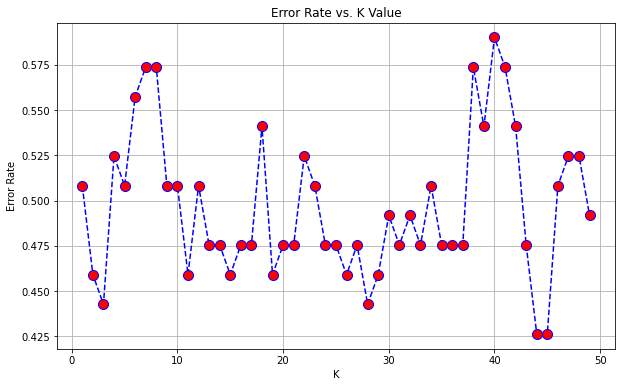

In [621]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [622]:
knn = KNeighborsClassifier(n_neighbors = 44)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67        30
           1       0.69      0.29      0.41        31

    accuracy                           0.57        61
   macro avg       0.62      0.58      0.54        61
weighted avg       0.62      0.57      0.54        61



WE get an f-1 score of 0.67, which is better than the logisitic model, but still not that great. Let's try more models. 

In [623]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [624]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [625]:
predictions = dtree.predict(x_test)

In [626]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.37      0.36        30
           1       0.37      0.35      0.36        31

    accuracy                           0.36        61
   macro avg       0.36      0.36      0.36        61
weighted avg       0.36      0.36      0.36        61



In [627]:
from sklearn.ensemble import RandomForestClassifier

In [628]:
rfc = RandomForestClassifier(n_estimators= 11)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        30
           1       0.47      0.45      0.46        31

    accuracy                           0.46        61
   macro avg       0.46      0.46      0.46        61
weighted avg       0.46      0.46      0.46        61



Not good at all. What is the minimum number of trees needed then?

In [629]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(x_train,y_train)
    predictions = rfc.predict(x_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

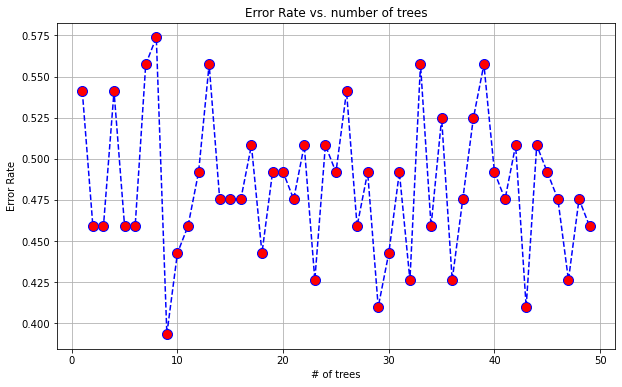

In [630]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. number of trees')
plt.xlabel('# of trees')
plt.ylabel('Error Rate')

In [631]:
rfc = RandomForestClassifier(n_estimators= 20)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.48      0.39      0.43        31

    accuracy                           0.48        61
   macro avg       0.48      0.48      0.47        61
weighted avg       0.48      0.48      0.47        61



What about for support vector machine?

In [632]:
from sklearn.svm import SVC

In [633]:
model = SVC()

In [634]:
model.fit(x_train,y_train)

SVC()

In [635]:
predictions = model.predict(x_test)

In [636]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        30
           1       0.00      0.00      0.00        31

    accuracy                           0.49        61
   macro avg       0.25      0.50      0.33        61
weighted avg       0.24      0.49      0.32        61



C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [637]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV

In [638]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [639]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.611 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.444 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [640]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [641]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [642]:
grid_predictions = grid.predict(x_test)

In [643]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.51      0.70      0.59        30
           1       0.55      0.35      0.43        31

    accuracy                           0.52        61
   macro avg       0.53      0.53      0.51        61
weighted avg       0.53      0.52      0.51        61



Not good enough at all. The highest f1-score we got was from the K Neighbors Classifier, where we got an f1-score of 0.67. We need to get more potentially useful data and figure out whether they are truly useful or not. 

From my weather knowledge, the prescence of El Nino/La Nina can influence the overall temperature in the wintertime.

In [644]:
seasurface = pd.read_csv('Sea Surface temp anamoly.csv')
seasurface = seasurface.rename(columns = {'Unnamed: 0' : 'Categorization'})
seasurface = seasurface.fillna(value = 'Neutral')
seasurface.head()

,Categorization,Year,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Average
0,Neutral,1950-1951,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,-0.283333
1,ME,1951-1952,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0,0.608333
2,WE,1952-1953,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,0.350000
3,WE,1953-1954,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,0.375000
4,WL,1954-1955,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7,-0.733333


Let's do some further analysis! The dataset has already classified whether an El Nino or a La Nina was present that year, and how strong or weak it was. 

<AxesSubplot:ylabel='Categorization'>

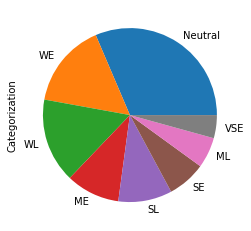

In [645]:
seasurface['Categorization'].value_counts(normalize=True).plot.pie()

Let's clean up the data a little bit.

In [646]:
seasurface = seasurface.drop(columns = seasurface.iloc[:,2:14])
seasurface['Actual Year'] = seasurface.apply(lambda row: row.Year.split('-',1)[1], axis = 1)
seasurface = seasurface.iloc[:69:,]
seasurface.head()

,Categorization,Year,Average,Actual Year
0,Neutral,1950-1951,-0.283333,1951
1,ME,1951-1952,0.608333,1952
2,WE,1952-1953,0.350000,1953
3,WE,1953-1954,0.375000,1954
4,WL,1954-1955,-0.733333,1955


Text(0.5, 0, 'Temp. Anamoly')

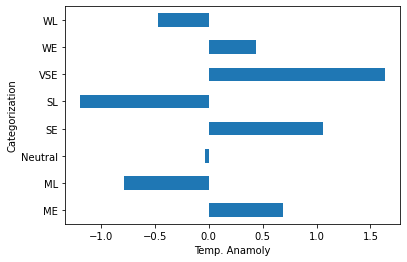

In [647]:
seasurface.groupby('Categorization')['Average'].mean().plot.barh()
plt.xlabel('Temp. Anamoly')

Now let's add the portion of the average that we have to the existing "tempmodel" dataframe. We'll have to create a new dataframe that will only have years 1951-2020.

In [648]:
tempmodel['YEAR'] = tempmodel['YEAR'].astype(int)
tempmodelshort = tempmodel.iloc[82:151:,]

In [649]:
tempmodelshort['Sea Surface Temp'] = seasurface['Average'].values
tempmodelshort['Categorization'] = seasurface['Categorization'].values
tempmodelshort.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_21636/2960516727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempmodelshort['Sea Surface Temp'] = seasurface['Average'].values
C:\Users\jason\AppData\Local\Temp/ipykernel_21636/2960516727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempmodelshort['Categorization'] = seasurface['Categorization'].values


,YEAR,OCT,NOV,DEC,JAN,Sea Surface Temp,Categorization
83,1951,1.476974,-2.742763,2.574342,1,-0.283333,Neutral
84,1952,-1.423026,2.357237,2.374342,1,0.608333,ME
85,1953,3.576974,3.457237,5.274342,0,0.350000,WE
86,1954,4.576974,0.157237,-0.125658,0,0.375000,WE
87,1955,2.676974,-1.942763,-6.325658,0,-0.733333,WL


Let's see how the frequency of below/above normal Janurarys stack up per sea surface categorization.

Text(0, 0.5, 'Number of occurances')

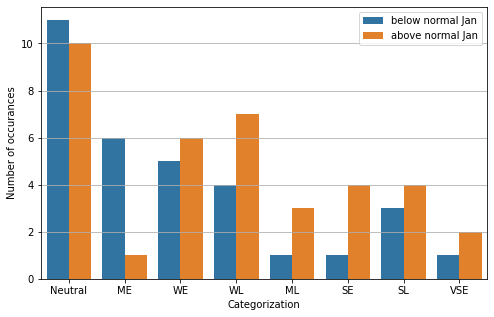

In [650]:
plt.figure(figsize = (8,5))
plt.grid()
sns.countplot(x='Categorization', hue = 'JAN', data = tempmodelshort)
plt.legend(['below normal Jan', 'above normal Jan'])
plt.ylabel('Number of occurances')

We see that in a ME year, Janurary is most likely to be below normal. Let's further explore the neutral area. Let's see if there are patterns involving Nov. and Dec. if we filter to just the neutral area.

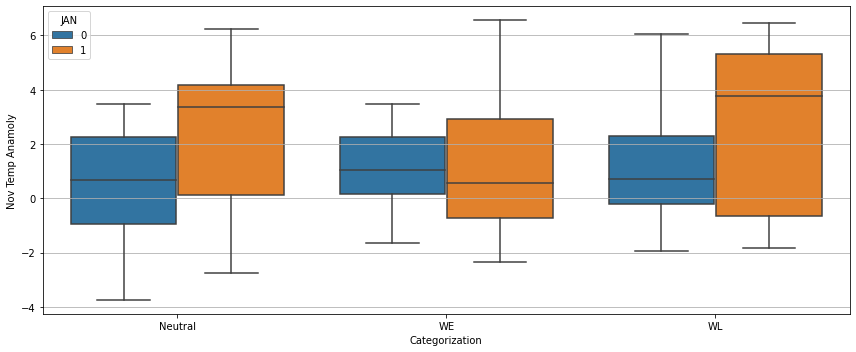

In [652]:
plt.figure(figsize = (12,5))
plt.grid()
sns.boxplot(x = 'Categorization', y= 'NOV', hue = 'JAN', data = tempmodelshort[(tempmodelshort['Categorization'].isin(['Neutral','WE','WL']))])
plt.ylabel('Nov Temp Anamoly')
plt.tight_layout()

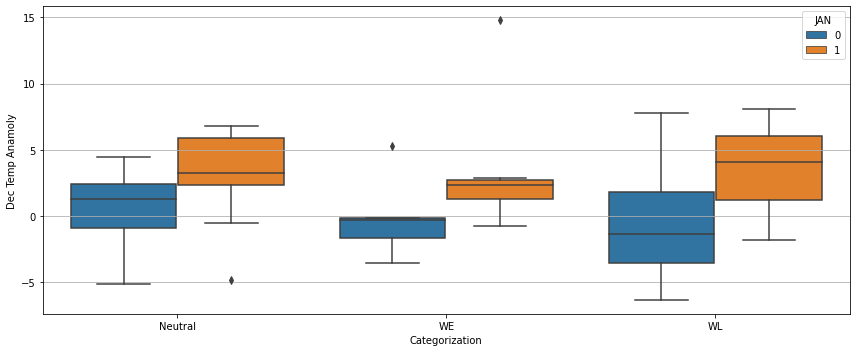

In [653]:
plt.figure(figsize = (12,5))
plt.grid()
sns.boxplot(x = 'Categorization', y= 'DEC', hue = 'JAN', data = tempmodelshort[(tempmodelshort['Categorization'].isin(['Neutral','WE','WL']))])
plt.ylabel('Dec Temp Anamoly')
plt.tight_layout()

what insights can we take from here? We were only interested in the statistics for a Neutral status, a weak El Nino status, and a weak La Nina status, as we have lots of data for those 3 phases only. Only in a weak el Nino phase is a warmer than normal November more likely to lead a below normal Janurary than a colder than normal November, but just slightly. In all 3 phases, if December is warmer than normal, than Janurary is also likely to be above normal as well. Now let's also look into the Diurnal temp. range.

October data is pretty useless in predicting Janurary data. Let's remove that one.

In [654]:
tempmodelshort = tempmodelshort.drop(columns = 'OCT')
tempmodelshort.head()

,YEAR,NOV,DEC,JAN,Sea Surface Temp,Categorization
83,1951,-2.742763,2.574342,1,-0.283333,Neutral
84,1952,2.357237,2.374342,1,0.608333,ME
85,1953,3.457237,5.274342,0,0.350000,WE
86,1954,0.157237,-0.125658,0,0.375000,WE
87,1955,-1.942763,-6.325658,0,-0.733333,WL


Let's next get the diurnal temp. variation for that month of that year 

In [655]:
tempbymonth = pd.read_csv("Central park temp data.csv")
tempbymonth['Month'] = tempbymonth.apply(lambda row: row.Year.split('-',1)[1], axis = 1)
tempbymonth['Year'] = tempbymonth.apply(lambda row: row.Year.split('-',1)[0], axis = 1)
tempbymonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1837 non-null   object 
 1   Highest Temp       1836 non-null   float64
 2   Average High Temp  1836 non-null   float64
 3   Average Low Temp   1836 non-null   float64
 4   Lowest Temp        1836 non-null   float64
 5   Rain               1837 non-null   float64
 6   Snow               1831 non-null   float64
 7   Precip Days        1837 non-null   int64  
 8   Snow Days          1831 non-null   float64
 9   Month              1837 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 143.6+ KB


Looks like we have missing data. We need to fill that in first. Let's first decide which columns we don't need.

In [656]:
tempbymonth = tempbymonth.drop(columns = ['Highest Temp', 'Lowest Temp', 'Rain', 'Snow', 'Snow Days'])

In [657]:
tempbymonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1837 non-null   object 
 1   Average High Temp  1836 non-null   float64
 2   Average Low Temp   1836 non-null   float64
 3   Precip Days        1837 non-null   int64  
 4   Month              1837 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 71.9+ KB


Fill in the missing data? Well since the missing data is for April, and we don't plan on using APril data for our prediction, we'll go ahead and remove that column.

In [658]:
tempbymonth = tempbymonth.drop(4, axis = 0)

Ok, let's go ahead and calculate the diurnal temp. variation for each month.

In [659]:
tempbymonth['Diurnal Range'] = tempbymonth['Average High Temp'] - tempbymonth['Average Low Temp']
tempbymonth['Diurnal Range'] = tempbymonth['Diurnal Range']*(1.8)
tempbymonth.head()

,Year,Average High Temp,Average Low Temp,Precip Days,Month,Diurnal Range
0,1869,4.2,-1.3,9,01,9.90
1,1869,4.3,-1.2,8,02,9.90
2,1869,5.5,-1.7,11,03,12.96
3,1869,13.1,6.7,8,04,11.52
5,1869,23.4,18.2,15,06,9.36


Now let's get the Diurnal Range data for just November and December and transfer that data to our model dataframe (called tempmodel)

In [660]:
tempbymonth['Year'] = tempbymonth['Year'].astype(int)
tempbymonth['Month'] = tempbymonth['Month'].astype(int)
tempmodel['Nov Diurnal Range'] = tempbymonth[tempbymonth['Month']==11][:-2]['Diurnal Range'].values
tempmodel['Dec Diurnal Range'] = tempbymonth[tempbymonth['Month']==12][:-2]['Diurnal Range'].values
tempmodel = tempmodel.drop(columns = ['OCT'])
tempmodel.head()

,YEAR,NOV,DEC,JAN,Nov Diurnal Range,Dec Diurnal Range
1,1869,-5.942763,-1.325658,1,10.26,12.06
2,1870,-0.742763,-1.925658,0,13.50,10.80
3,1871,-7.442763,-6.825658,0,13.14,12.24
4,1872,-5.242763,-9.325658,0,12.42,12.78
5,1873,-9.242763,0.474342,1,12.60,12.78


<AxesSubplot:>

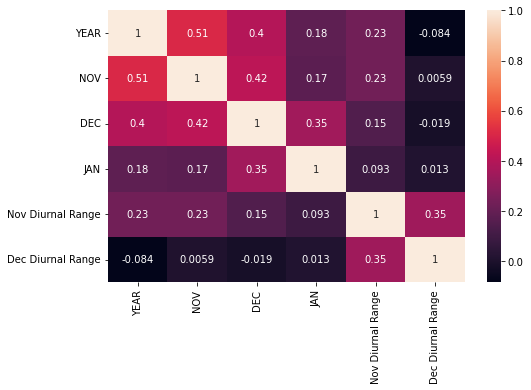

In [675]:
plt.figure(figsize = (8,5))
sns.heatmap(tempmodel.corr(), annot = True)

Unfortunately, the dirunal ranges from both months do not have any correlation with Janurary. If we were to include those 2 variables into any supervised learning model, we would definitely not an increase in the f1-score at all. The next step now is to analyze the 2 variables further to see if we can get any insight from them. We can start by creating a box plot of each variable to see if there are any differences for a cold Janurary vs. a warm Janurary.

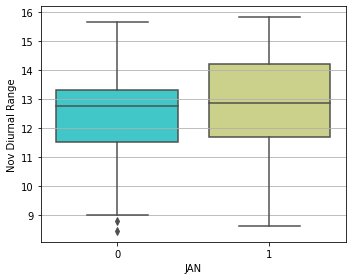

In [677]:
plt.figure(figsize = (5,4))
plt.grid()
sns.boxplot(x = 'JAN', y = 'Nov Diurnal Range', data = tempmodel, palette = 'rainbow')
plt.tight_layout()

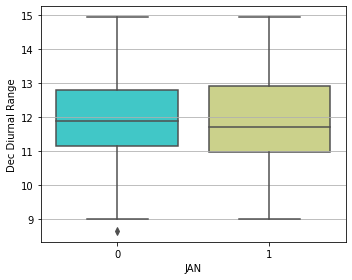

In [678]:
plt.figure(figsize = (5,4))
plt.grid()
sns.boxplot(x = 'JAN', y = 'Dec Diurnal Range', data = tempmodel, palette = 'rainbow')
plt.tight_layout()

In [663]:
tempmodel.describe()

,YEAR,NOV,DEC,JAN,Nov Diurnal Range,Dec Diurnal Range
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1944.000000,-0.044750,-0.021022,0.490066,12.644106,11.794172
std,43.734045,3.181100,4.244563,0.501565,1.457439,1.356080
min,1869.000000,-9.242763,-11.125658,0.000000,8.460000,8.640000
25%,1906.500000,-1.942763,-2.625658,0.000000,11.610000,10.980000
50%,1944.000000,-0.242763,-0.025658,0.000000,12.780000,11.700000
75%,1981.500000,2.207237,2.824342,1.000000,13.680000,12.780000
max,2019.000000,6.557237,14.774342,1.000000,15.840000,14.940000


Unfortunately there isn't a way to distinguish a below normal Janurary from an above normal Janurary using Diurnal temp. data from November and December.

Last but not least, can we perform Multivariate Data Analysis? In other words, can we answer the question of whether an above normal November + a high diurnal range that same November is more likely to end up with the following Janurary being above normal, than a below normal November + a low diurnal temp. range that November?

<AxesSubplot:xlabel='YEAR', ylabel='NOV'>

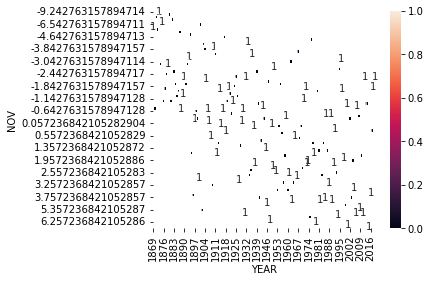

In [664]:
plt.figure(figsize = (5,4))
plt.grid()
#tempmodel['JAN'] = np.where(tempmodel.JAN=='Below',0,1)
sns.heatmap(pd.pivot_table(data = tempmodel, index = 'NOV', columns = 'YEAR', values = 'JAN'), annot=True)

This is not what I want to see. Why does it look wonky? This is because we'll need to categorize our numerical columns. A pairplot would be more accurate in comparing 2 continious columns.
Let's divide our temp. anamolies into; Below Normal, Normal, Above Normal. It's up to you to decide what the cutoffs should be, but it should be in a manner where each of the categories will have similar amounts of data.
Same thing for dividing our Diurnal Temp. ranges into categories of; Low Range, Medium Range, High Range for November.

In [665]:
catlist = []
catlist2 = []
for temp in tempmodel['NOV']:

        
    if temp <= -1.5 :
        catlist.append('Below Normal')
    elif temp > -1.5 and temp < 1.5 :
        catlist.append('Normal')
    else:
        catlist.append('Above Normal')

for dirange in tempmodel['Nov Diurnal Range']:
    if dirange <= 11.8 :
        catlist2.append('Low Range')
    elif dirange > 11.8 and dirange < 13.4 :
        catlist2.append('Medium Range')
    else :
        catlist2.append('High Range')

tempmodel['NOV ANAMOLY CAT'] = catlist
tempmodel['NOV DI RANGE'] = catlist2
tempmodel.head()

,YEAR,NOV,DEC,JAN,Nov Diurnal Range,Dec Diurnal Range,NOV ANAMOLY CAT,NOV DI RANGE
1,1869,-5.942763,-1.325658,1,10.26,12.06,Below Normal,Low Range
2,1870,-0.742763,-1.925658,0,13.50,10.80,Normal,High Range
3,1871,-7.442763,-6.825658,0,13.14,12.24,Below Normal,Medium Range
4,1872,-5.242763,-9.325658,0,12.42,12.78,Below Normal,Medium Range
5,1873,-9.242763,0.474342,1,12.60,12.78,Below Normal,Medium Range


In [666]:
tempmodel['NOV ANAMOLY CAT'].value_counts()

Below Normal    51
Normal          50
Above Normal    50
Name: NOV ANAMOLY CAT, dtype: int64

In [667]:
tempmodel['NOV DI RANGE'].value_counts()

Medium Range    63
High Range      45
Low Range       43
Name: NOV DI RANGE, dtype: int64

<AxesSubplot:xlabel='NOV DI RANGE', ylabel='NOV ANAMOLY CAT'>

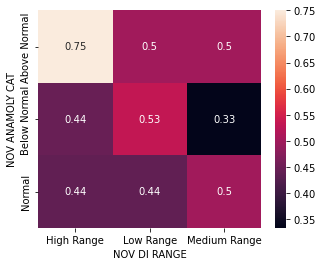

In [668]:
plt.figure(figsize = (5,4))
plt.grid()
#tempmodel['JAN'] = np.where(tempmodel.JAN=='Below',0,1)
sns.heatmap(pd.pivot_table(data = tempmodel, index = 'NOV ANAMOLY CAT', columns = 'NOV DI RANGE', values = 'JAN'), annot=True)

These values are not ideal (meaning most of these values are not closer to either 0 or 1). This makes sense as November is too far away from Janurary to really make an accurate prediction. Let's look at December then.

In [669]:
catlist = []
catlist2 = []
for temp in tempmodel['DEC']:
        
    if temp <= -2.0 :
        catlist.append('Below Normal')
    elif temp > -2.0 and temp < 2.0 :
        catlist.append('Normal')
    else:
        catlist.append('Above Normal')

for dirange in tempmodel['Dec Diurnal Range']:
    if dirange <= 11 :
        catlist2.append('Low Range')
    elif dirange > 11 and dirange < 12.6 :
        catlist2.append('Medium Range')
    else :
        catlist2.append('High Range')

tempmodel['DEC ANAMOLY CAT'] = catlist
tempmodel['DEC DI RANGE'] = catlist2
tempmodel.head()

,YEAR,NOV,DEC,JAN,Nov Diurnal Range,Dec Diurnal Range,NOV ANAMOLY CAT,NOV DI RANGE,DEC ANAMOLY CAT,DEC DI RANGE
1,1869,-5.942763,-1.325658,1,10.26,12.06,Below Normal,Low Range,Normal,Medium Range
2,1870,-0.742763,-1.925658,0,13.50,10.80,Normal,High Range,Normal,Low Range
3,1871,-7.442763,-6.825658,0,13.14,12.24,Below Normal,Medium Range,Below Normal,Medium Range
4,1872,-5.242763,-9.325658,0,12.42,12.78,Below Normal,Medium Range,Below Normal,High Range
5,1873,-9.242763,0.474342,1,12.60,12.78,Below Normal,Medium Range,Normal,High Range


In [670]:
tempmodel['DEC ANAMOLY CAT'].value_counts()

Above Normal    58
Below Normal    49
Normal          44
Name: DEC ANAMOLY CAT, dtype: int64

In [671]:
tempmodel['DEC DI RANGE'].value_counts()

Medium Range    63
High Range      46
Low Range       42
Name: DEC DI RANGE, dtype: int64

<AxesSubplot:xlabel='DEC DI RANGE', ylabel='DEC ANAMOLY CAT'>

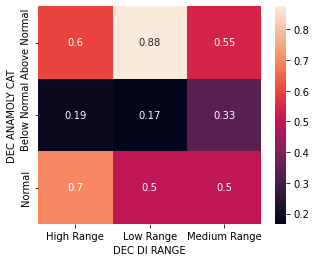

In [672]:
plt.figure(figsize = (5,4))
plt.grid()
#tempmodel['JAN'] = np.where(tempmodel.JAN=='Below',0,1)
sns.heatmap(pd.pivot_table(data = tempmodel, index = 'DEC ANAMOLY CAT', columns = 'DEC DI RANGE', values = 'JAN'), annot=True)

What can take from this analysis? We know an above normal December is more likely to lead to an above normal Janurary than a below normal December, but what about when Diurnal Range is also involved? We see that the distinction between a below normal Janurary and an above normal Janurary is the greatest for a December diurnal range that is considered LOW.

One more analysis; what about the combination of November + December anamoly temps? Is a warm November + warm December really more likely to lead to a warm Janurary? What about a cold November + cold December?

<AxesSubplot:xlabel='DEC ANAMOLY CAT', ylabel='NOV ANAMOLY CAT'>

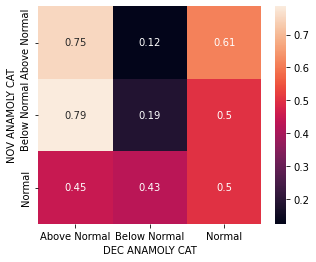

In [673]:
plt.figure(figsize = (5,4))
plt.grid()
#tempmodel['JAN'] = np.where(tempmodel.JAN=='Below',0,1)
sns.heatmap(pd.pivot_table(data = tempmodel, index = 'NOV ANAMOLY CAT', columns = 'DEC ANAMOLY CAT', values = 'JAN'), annot=True)

Surprisingly, we can see that a warm November + a cold December is more likely to lead to a cold Janurary than a cold November + a cold December. We also see a cold November + a warm December is just as likely to lead to a warm Janurary than a warm November + a warm December. 

To conclude, unfortunately, in order to make an accurate prediction on whether Janurary will be warm or cold, we had to stick to performing exploratory data analysis (EDA) on 3 critical process parameters each for November and December; temp. anamoly of each month which later became categorized, sea surface temperature, and the dirunal temp. range for each month which also became categorized. Based on the heat maps, sending all these variables through a supervised learning model will not give us a high f-1 score, so we had to scruntize each variable further to see if we can grab anything useful.

One of the biggest drawbacks of this project was not having enough data; for the sea surface temperature, reliable data only goes far back to 1950. There are other variables we could not get any data for (such as the standard deviation for each month by temperature, the number of cold fronts of any severity that swept through the city by month, and the amount of sunshine recieved by month). It is also likely that these variables will have no correlation with Janurary and further digestion of each variable would happen. At some point, doing that would take too long and unnecessary, as the variables we've analyzed earlier have already told us a story. This is why EDA is so important; heat maps and supervised learning models won't always give us accurate predictions.